**Assignment Part 2**

1. Read data from given csv files, merge it by the “time” column, create a datetime index with the column “time”.
2. Check basic information about the data (e.g. type, size, missing values)
3. Suggest a few ways to get rid of missing values (e.g., delete, replace with another value). 
4. Make plots for all channels in data.
5. Print mean values for grouped data by the hour, month, year. Try other statistical functions.
6. Make plots for the mean values for grouped data by the hour, month, year (from previous point).
7. Create additional column with {0,1} values. 1 if given value from “channel_a” is greater than 250, otherwise 0.
8. Make a plot for “channel_a” data with values greater than 250 marked with different colour. 
9. Write a function that returns data from the date range specified in the function parameters (start_date, end_date). 
10. Write a function that returns the indexes of the points from the given column in Data Frame that are greater than mean + 2 * std. Add a line that marks the boundary for the marked points.
11. Make a plot with the marked points received from the function from the previous task. 
13. Save the data from channel_a to csv. The data in csv should have a frequency of 1h (it is necessary to make aggregation. e.g. mean). The data should also not have a value greater than 250 (replace with an empty value).

In [68]:
### Import basic packages ###

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**1. Read data from given csv files, merge it by the “time” column, create a datetime index with the column “time”.**

In [43]:
# define pd dataframes

df_a = pd.read_csv("data_a.csv")
df_b = pd.read_csv("data_b.csv")
df_c = pd.read_csv("data_c.csv")

In [39]:
# Check the data type of 'time' column in dfs
print(df_a.info(), df_b.info(), df_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78516 entries, 0 to 78515
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       78516 non-null  object 
 1   channel_a  78505 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80287 entries, 0 to 80286
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       80287 non-null  object 
 1   channel_b  80265 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75602 entries, 0 to 75601
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       75602 non-null  object 
 1   channel_c  75561 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB
None None None


In [40]:
#Merge dataframes with how=outer to keep all rows
df_1 = df_a.merge(df_b, on='time',how='outer',)
df_data = df_1.merge(df_c, on='time', how='outer')
print(df_data)

                      time   channel_a   channel_b   channel_c
0      2023-02-15T13:50:00         NaN  353.769989         NaN
1      2023-02-15T13:55:00         NaN  353.779999         NaN
2      2023-02-15T14:00:00         NaN  349.609985         NaN
3      2023-02-15T14:05:00  230.210007  355.950012         NaN
4      2023-02-15T14:10:00  224.690002  354.839996         NaN
...                    ...         ...         ...         ...
80290  2023-11-20T04:20:00         NaN  225.830002         NaN
80291  2023-11-20T04:25:00         NaN  229.000000         NaN
80292  2023-11-20T04:30:00         NaN  221.910004         NaN
80293  2023-11-20T04:35:00         NaN  213.229996         NaN
80294  2023-05-01T00:07:30         NaN         NaN  192.610001

[80295 rows x 4 columns]


In [41]:
#Create datetime index

df_data['time'] = pd.to_datetime(df_data['time'])


In [ ]:
#set 'time' as index

df_data.set_index('time', inplace=True)

**--------------------------------------------------------------------------------------**

**2. Check basic information about the data (e.g. type, size, missing values)**

In [52]:
#Basic information about the data

print(df_data.describe(),"/n",df_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80295 entries, 2023-02-15 13:50:00 to 2023-05-01 00:07:30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   channel_a  78505 non-null  float64
 1   channel_b  80265 non-null  float64
 2   channel_c  75561 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB
          channel_a     channel_b     channel_c
count  78505.000000  80265.000000  75561.000000
mean     179.408043    358.319335    191.336273
std       30.439674     63.111887     29.145251
min      100.000000      0.000000     97.589996
25%      160.020004    316.420013    170.559998
50%      182.199997    364.950012    196.360001
75%      198.919998    401.899994    213.679993
max      322.959991    575.570007    303.329987 /n None


In [53]:
# Check for missing values
print(df_data.isnull().sum())

channel_a    1790
channel_b      30
channel_c    4734
dtype: int64


In [64]:
# Check for duplicates
print(df_data.duplicated().sum())

duplicate_rows = df_data[df_data.duplicated()]
print("Exact Duplicate Records:")
print(duplicate_rows) # Here we see that all duplicated rows are simply missing values

30
Exact Duplicate Records:
                     channel_a   channel_b  channel_c
time                                                 
2023-02-14 07:55:00        NaN         NaN        NaN
2023-02-14 08:00:00        NaN         NaN        NaN
2023-02-14 08:05:00        NaN         NaN        NaN
2023-02-14 08:10:00        NaN         NaN        NaN
2023-02-14 09:10:00        NaN         NaN        NaN
2023-02-14 09:15:00        NaN         NaN        NaN
2023-02-14 09:20:00        NaN         NaN        NaN
2023-02-14 09:25:00        NaN         NaN        NaN
2023-02-14 09:30:00        NaN         NaN        NaN
2023-02-14 09:35:00        NaN         NaN        NaN
2023-02-14 09:40:00        NaN         NaN        NaN
2023-02-14 09:45:00        NaN         NaN        NaN
2023-02-14 09:50:00        NaN         NaN        NaN
2023-02-14 09:55:00        NaN         NaN        NaN
2023-02-14 10:00:00        NaN         NaN        NaN
2023-02-14 10:05:00        NaN         NaN        NaN


**3. Suggest a few ways to get rid of missing values (e.g., delete, replace with another value).**

In [67]:
# There are two options to get rid of missing values

# 1. Drop rows with missing values
df_data = df_data.dropna()
print(df_data.duplicated().sum())

# Here we can verify that the dupliated data is gone
duplicate_rows = df_data[df_data.duplicated()]
print("Exact Duplicate Records:")
print(duplicate_rows)

# 2. We could also try to fill missing values with an inference method. 

0
Exact Duplicate Records:
Empty DataFrame
Columns: [channel_a, channel_b, channel_c]
Index: []


**4. Make plots for all channels in data.**

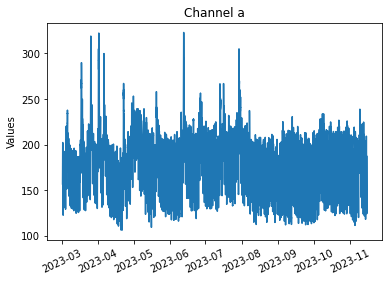

In [84]:
#Very basic plot for channel a

fig, ax = plt.subplots()
ax.plot(df_data.index, df_data['channel_a'])

ax.set_xlabel("Time")
ax.set_ylabel("Values")
plt.xticks(rotation=25)
plt.title("Channel a")
plt.show()


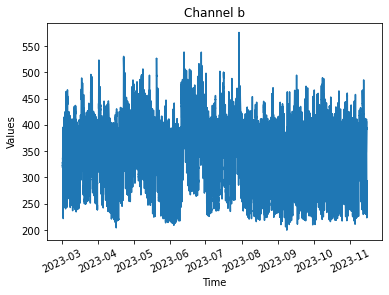

In [86]:
#Very basic plot for channel b

fig, ax = plt.subplots()
ax.plot(df_data.index, df_data['channel_b'])

ax.set_xlabel("Time")
ax.set_ylabel("Values")
plt.xticks(rotation=25)
plt.title("Channel b")
plt.show()


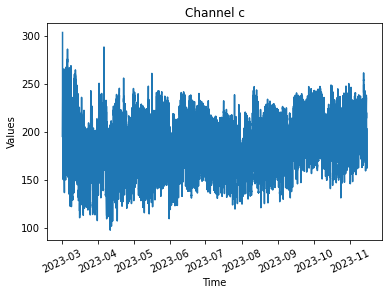

In [87]:
#Very basic plot for channel c

fig, ax = plt.subplots()
ax.plot(df_data.index, df_data['channel_c'])

ax.set_xlabel("Time")
ax.set_ylabel("Values")
plt.xticks(rotation=25)
plt.title("Channel c")
plt.show()


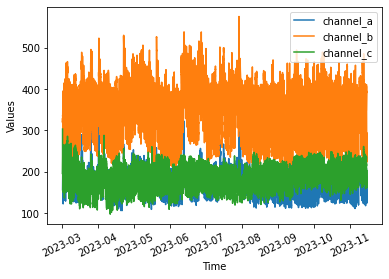

In [88]:
#Not so pretty plot with all 3 channels

fig, ax = plt.subplots()
ax.plot(df_data.index, df_data['channel_a'], label='channel_a')
ax.plot(df_data.index, df_data['channel_b'], label='channel_b')
ax.plot(df_data.index, df_data['channel_c'], label='channel_c')

ax.set_xlabel("Time")
ax.set_ylabel("Values")
ax.legend()
plt.xticks(rotation=25)

plt.show()

